## Generate patterns on an RGB frame
### Setup

In [1]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("../")

from core import ColorFrame, Painter, SequencePattern
import numpy as np

# save_dir = '../MATLAB-Andor/data/2025/04 April/20250423/'
#save_dir = '../MATLAB-Andor/data/2025/05 May/20250506/'
#save_dir = "../MATLAB-Andor/data/2025/05 May/20250506/"
save_dir = "../MATLAB-Andor/data/2025/06 June/20250626/"

dmd = ColorFrame()
painter = Painter()
dmd.dmd_nrows, dmd.dmd_ncols, dmd.real_nrows, dmd.real_ncols

# Lattice calibration
# here are the values from April 2025
#V = [[-7.15,   -7.79], [-3.30,   10.26], [-10.45,    2.47]] 
#R = [730.54,  764.70]
# updating on 5/6/2025
#V = [[-7.14,  -7.77],  [-3.29,  10.25],  [-10.43,  2.48]]
#R = [730.54,764.698]

# updating again on 5/7/2025 with p.LatCalib.DMD.V: use vec1, vec2, vec1+vec2
#V = [[-7.1549,  -7.7664],  [-3.2974,  10.2501],  [-10.4523,  2.4837]]
#R = [736.3979,683.7460]

# updating again on 5/8/2025 with p.LatCalib.DMD.V: use vec1, vec2, vec1+vec2
#V = [[-7.1247,  -7.7104],  [-3.293,  10.175],  [-10.4177,  2.4646]]
#R = [731.0751,654.84]

# updating again on 5/15/2025 with p.LatCalib.DMD.V: use vec1, vec2, vec1+vec2
# V = [[-7.0857,  -7.769],  [-3.333,  10.1945],  [-10.4187,  2.4253]]
# R = [709.3501,737.8052]

# updating again on 5/16/2025 with p.LatCalib.DMD.V: use vec1, vec2, vec1+vec2
# V = [[-7.1247,  -7.7104],  [-3.2930,  10.1752],  [-10.4177,  2.4647]]
# R = [731.0751,654.8409]

# updating again on 5/21/2025 with p.LatCalib.DMD.V: use vec1, vec2, vec1+vec2
#V = [[-7.16,   -7.78],  [-3.31,   10.25],  [-10.48,    2.47]]
#R = [719.81,  748.48]

# updating again on 6/3/2025 with p.LatCalib.DMD.V: use vec1, vec2, vec1+vec2
V = [[-7.14,   -7.79],  [-3.30,   10.23],  [-10.44,    2.45]]
R = [723.75,  737.68]

### Lines

#### Draw lines along lattice vectors

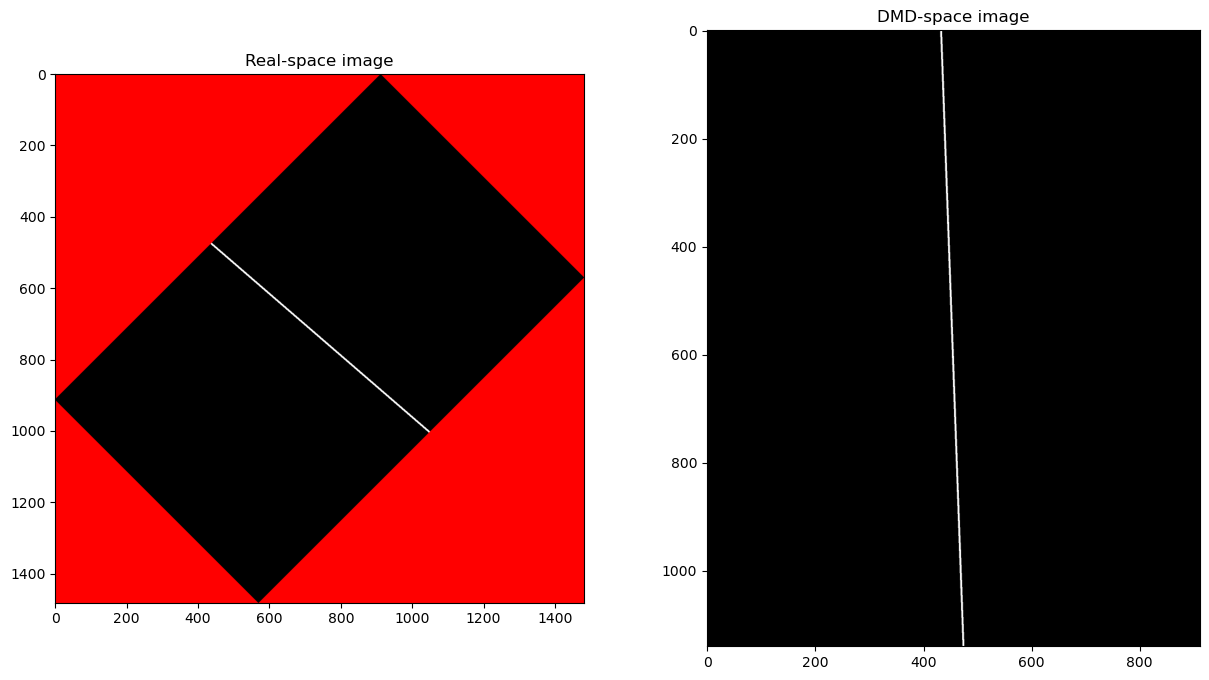

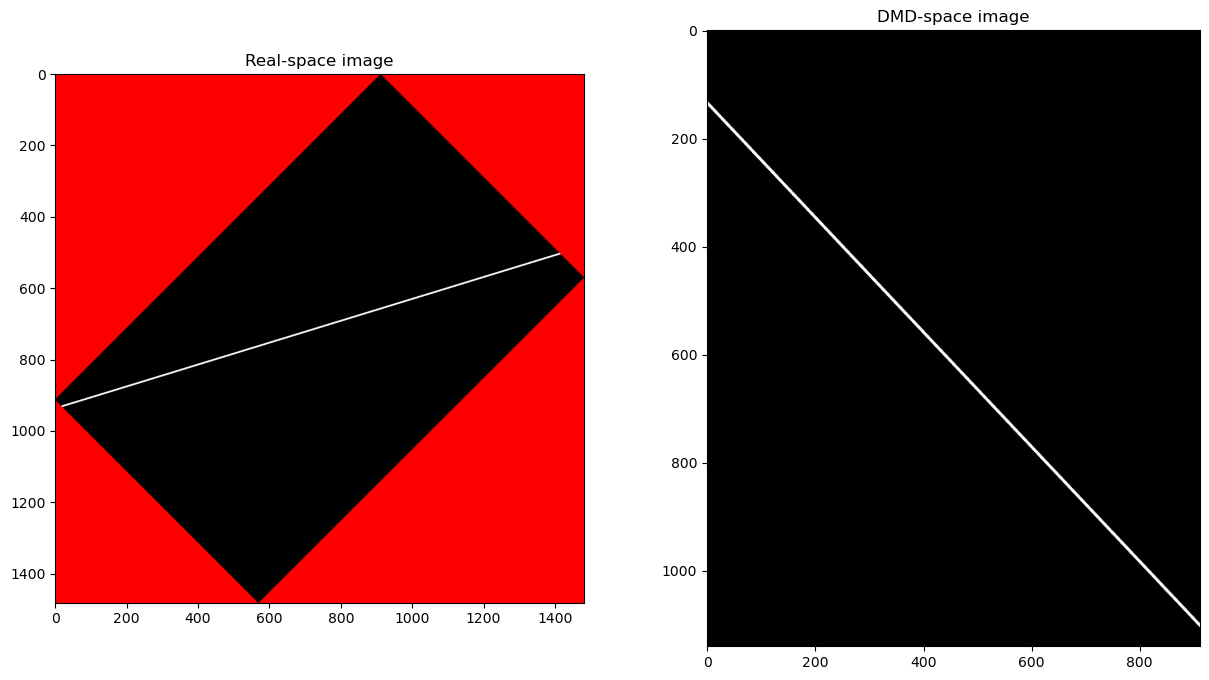

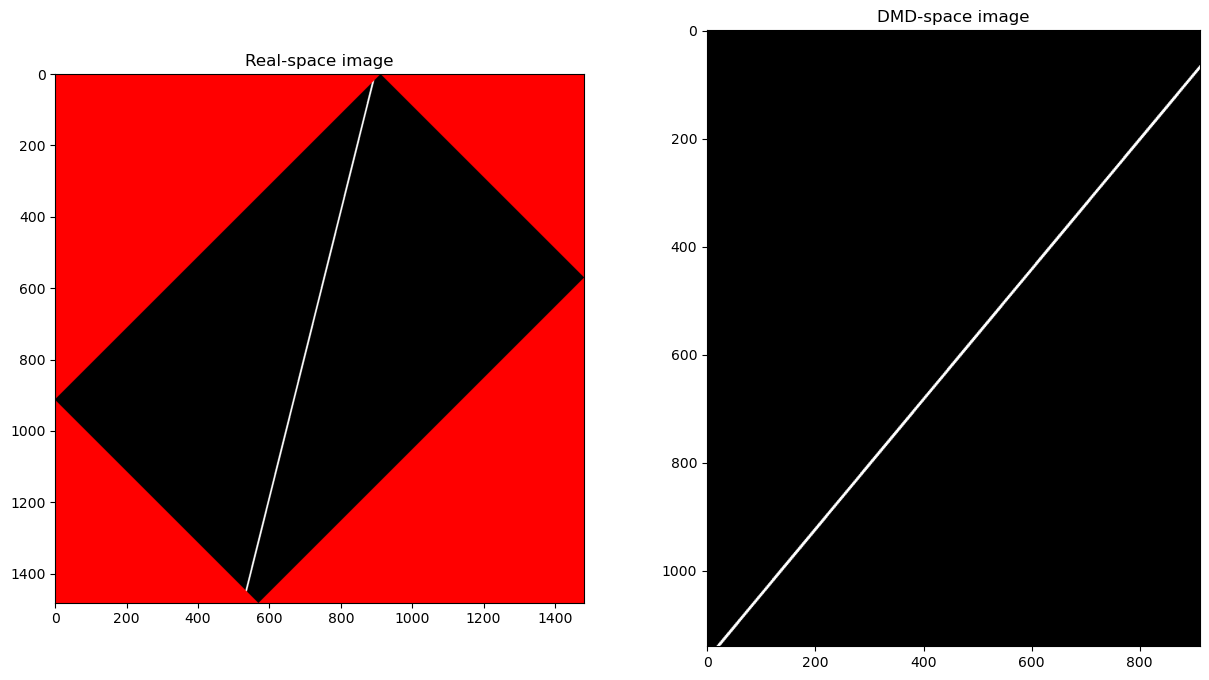

In [2]:
width = 5
offset = 0
Radj = [R[0] + offset, R[1] + offset]
for i in range(3):
    dmd.drawPattern(painter.drawLineRV(Radj, V[i], width), color = 1, template_color=0)
    dmd.saveFrameToFile(save_dir, f'white_line_v{i + 1}_python_offset{offset}.bmp')
    dmd.displayPattern()

In [41]:
width = 5
dmd.setRealArray(color=[0, 0, 0])
for i in range(3):
    dmd.drawPattern(painter.drawLineRV(R, V[i], width), color = 1, reset=False)
dmd.saveFrameToFile(save_dir, f'white_line_v123_python.bmp')

#### Draw lines along a vector V2 and shifted along V1 by a few lattice sites

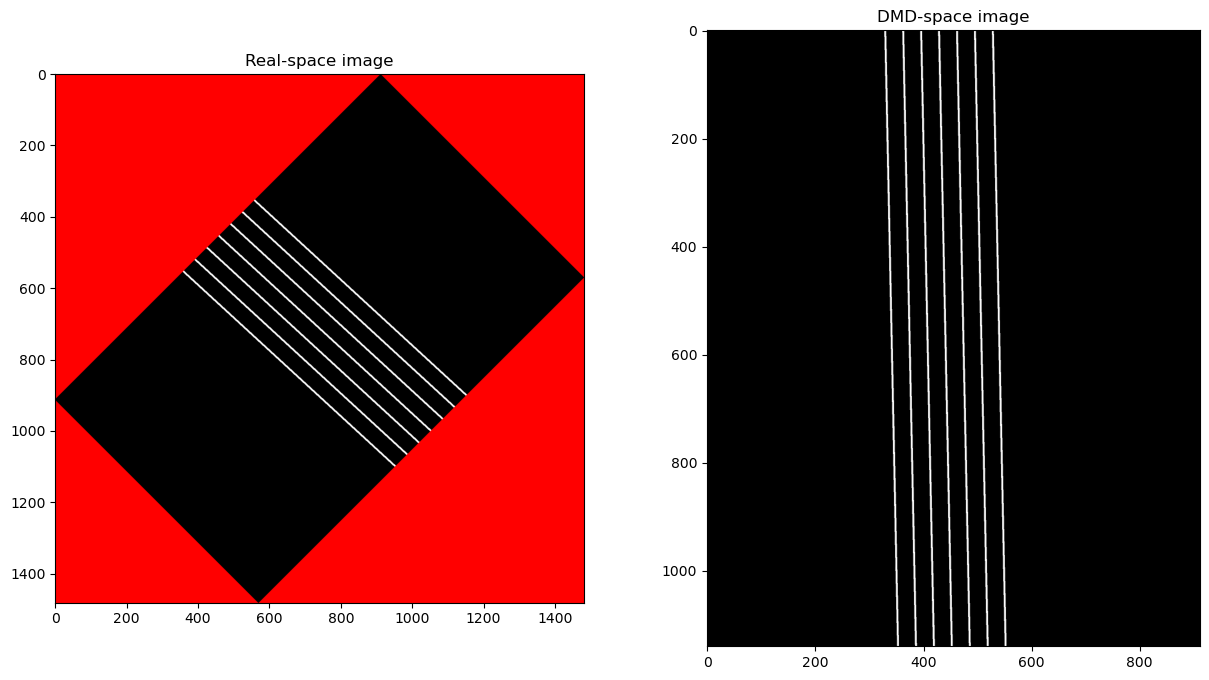

In [42]:
width = 5
V1 = V[1]
V2 = V[0]
offset = [-15, -10, -5, 0, 5, 10, 15]

dmd.setRealArray(color=[0, 0, 0])
for i in offset:
    R_new = [R[0] + i * V1[0], R[1] + i * V1[1]]
    dmd.drawPattern(painter.drawLineRV(R_new, V2, width), color = 1, template_color=0, reset=False)
dmd.displayPattern()
dmd.saveFrameToFile(save_dir, f'V1={V1}_V2={V2}_offset={offset}_width={width}.bmp')

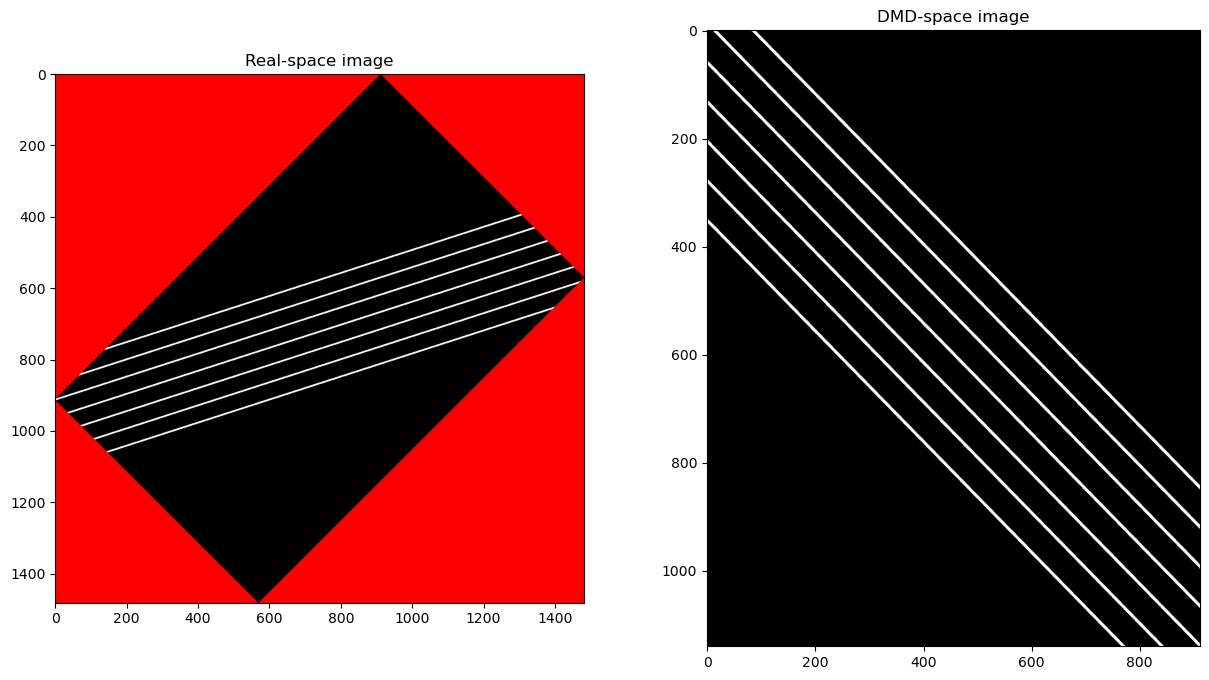

In [36]:
width=5
V2 = V[1]
V1 = V[0] # just swapped V2 and V1 in order to make lines along vec1
offset = [-15, -10, -5, 0, 5, 10, 15]

dmd.setRealArray(color=[0, 0, 0])
for i in offset:
    R_new = [R[0] + i * V1[0], R[1] + i * V1[1]]
    A = -V2[1]
    B = V2[0]
    C =  V2[1] * (R_new[0] - 1) - V2[0] * (R_new[1] - 1)
    dmd.drawPattern(painter.drawLineABC(A, B, C, width), color = 1, template_color=0, reset=False)
dmd.displayPattern()
dmd.saveFrameToFile(save_dir, f'V1={V2}_V2={V1}_offset={offset}_width={width}.bmp') # i also swapped v2 and v1 in the filename

Draw lines along lattice vecor, shift by one pixel at a time

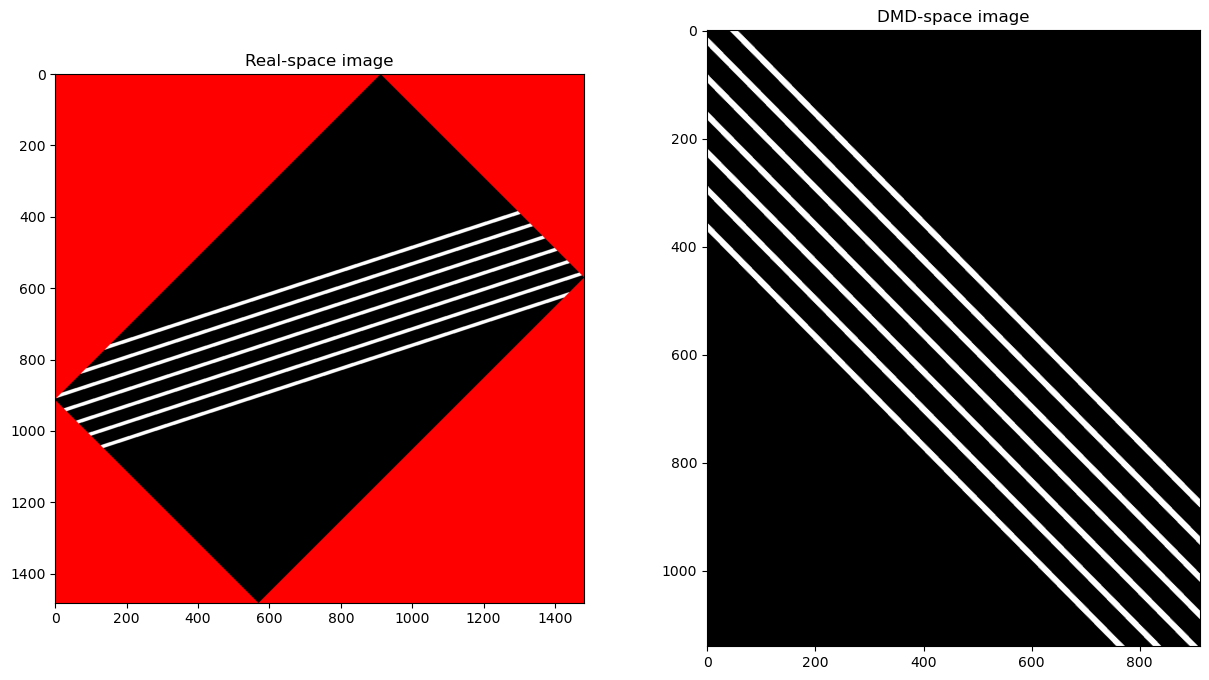

In [68]:
width=10
V2 = V[1]
V1 = V[0] # just swapped V2 and V1 in order to make lines along vec1
offset = [-15, -10, -5, 0, 5, 10, 15]

dmd.setRealArray(color=[0, 0, 0])
for i in offset:
    R_new = [R[0] + i * V1[0], R[1] + i * V1[1]]
    A = -V2[1]
    B = V2[0]
    C =  V2[1] * (R_new[0] - 1) - V2[0] * (R_new[1] - 1)+5*i
     # adding 10*i to C so that the lines end up being shifted each by some number of pixels from
    # where the lattice would put it
    dmd.drawPattern(painter.drawLineABC(A, B, C, width), color = 1, template_color=0, reset=False)
dmd.displayPattern()
dmd.saveFrameToFile(save_dir, f'V1={V2}_V2={V1}_offset={offset}_width={width}_offlat={offset}.bmp') # i also swapped v2 and v1 in the filename
    # adding 10*i to C so that the lines end up being shifted each by some number of pixels from
    # where the lattice would put it


#### Draw 3 lines triangles along lattice vectors

In [47]:
offset = 5  # offset in the unit of lattice sites
width = 5
dmd.setRealArray(color=[0, 0, 0])
R1 = [R[0] + offset * V[1][0], R[1] + offset * V[1][1]]
R2 = [R[0] - offset * V[0][0], R[1] - offset * V[0][1]]
R3 = [R[0] + offset * V[0][0], R[1] + offset * V[0][1]]
dmd.drawPattern(painter.drawLineRV(R1, V[0], width), color = 1, template_color=0, reset=False)
dmd.drawPattern(painter.drawLineRV(R2, V[1], width), color = 1, template_color=0, reset=False)
dmd.drawPattern(painter.drawLineRV(R3, V[2], width), color = 1, template_color=0, reset=False)
dmd.saveFrameToFile(save_dir, f'triangle_offset={offset}_width={width}.bmp')

### Circles

In [4]:
r = 50
dmd.drawPattern(painter.drawCircleXY(R[0] - 1, R[1] - 1, r), color = 0, template_color=1)
dmd.saveFrameToFile(save_dir, f'circle_dark_center_python_r={r}.bmp')

#### Draw array of circles at lattice points

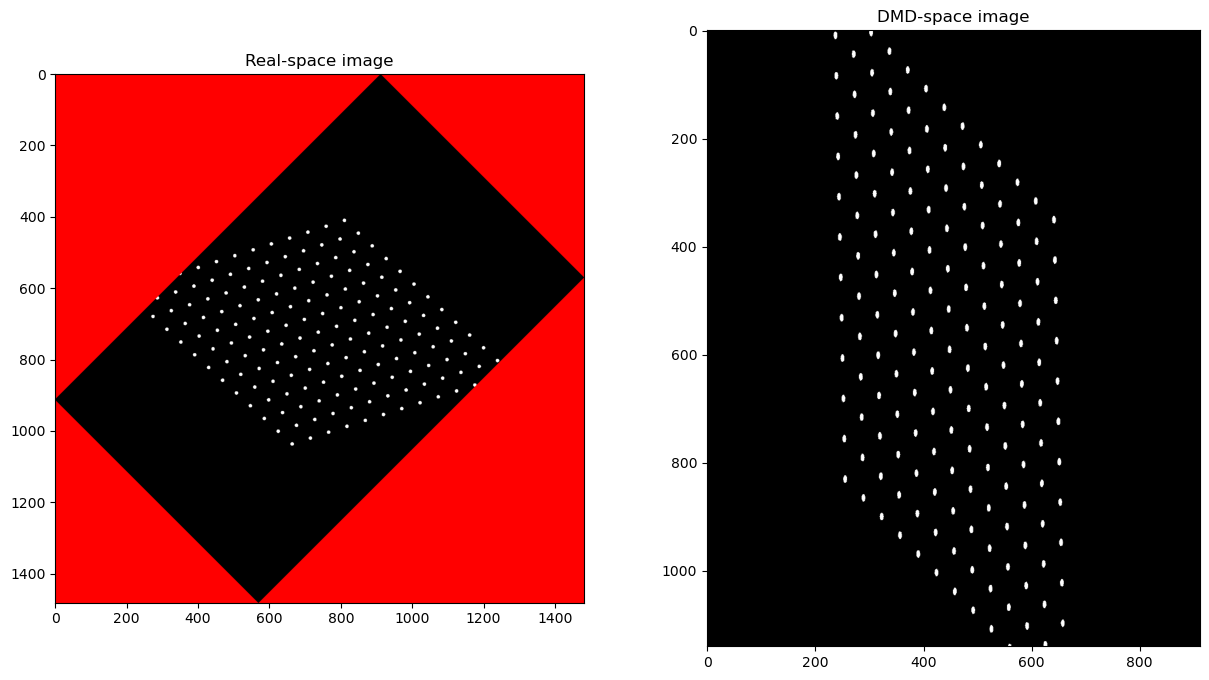

In [2]:
r = 5
step = 5
sites1 = [(i, j) for i in range(-30, 31, step) for j in range(-30, 31, step)]

dmd.setRealArray(color=0)
for i, j in sites1:
    x = i * V[0][0] + j * V[1][0] + R[0] - 1
    y = i * V[0][1] + j * V[1][1] + R[1] - 1
    dmd.drawPattern(painter.drawCircleXY(x, y, r), color=1, template_color=0, reset=False)

dmd.saveFrameToFile(save_dir, f'circle_array_python_r={r}_step={step}.bmp')
dmd.displayPattern()

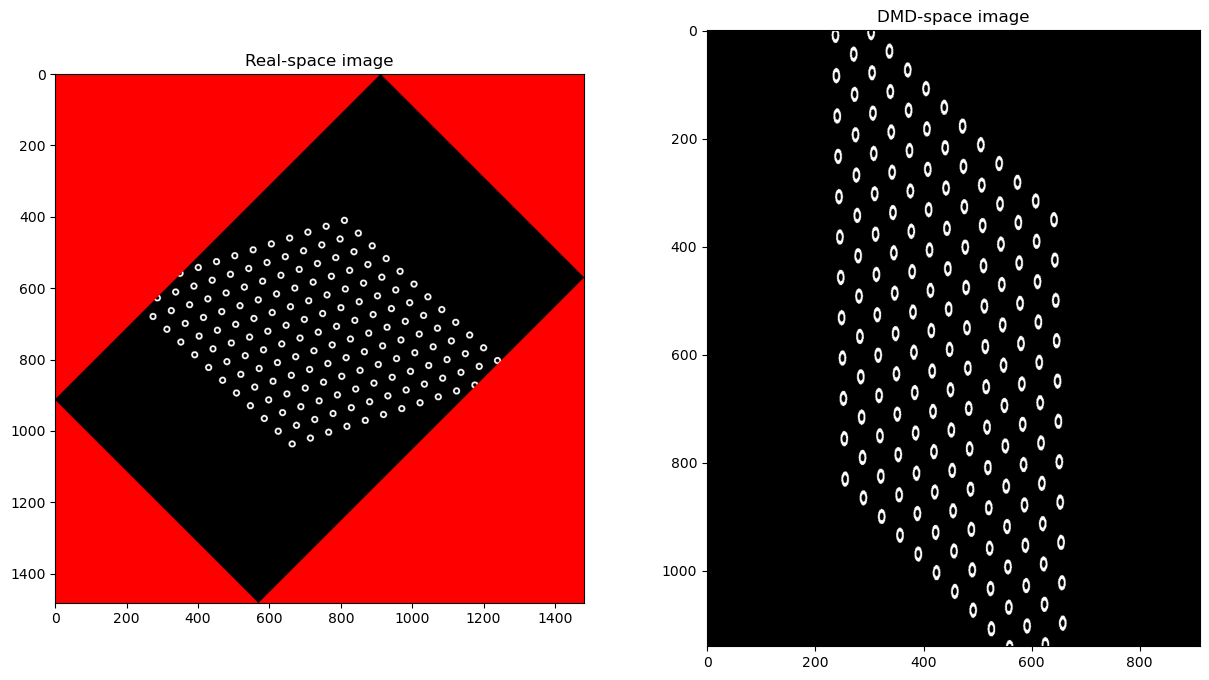

In [3]:
# adding a donut maker
rout = 10
rin = 5
step = 5
sites1 = [(i, j) for i in range(-30, 31, step) for j in range(-30, 31, step)]

dmd.setRealArray(color=0)
for i, j in sites1:
    x = i * V[0][0] + j * V[1][0] + R[0] - 1
    y = i * V[0][1] + j * V[1][1] + R[1] - 1
    dmd.drawPattern(painter.drawCircleXY(x, y, rout), color=1, template_color=0, reset=False)
    dmd.drawPattern(painter.drawCircleXY(x, y, rin), color=0, template_color=0, reset=False)

dmd.saveFrameToFile(save_dir, f'circle_array_python_rout={rout}_rin={rin}_step={step}.bmp')
dmd.displayPattern()

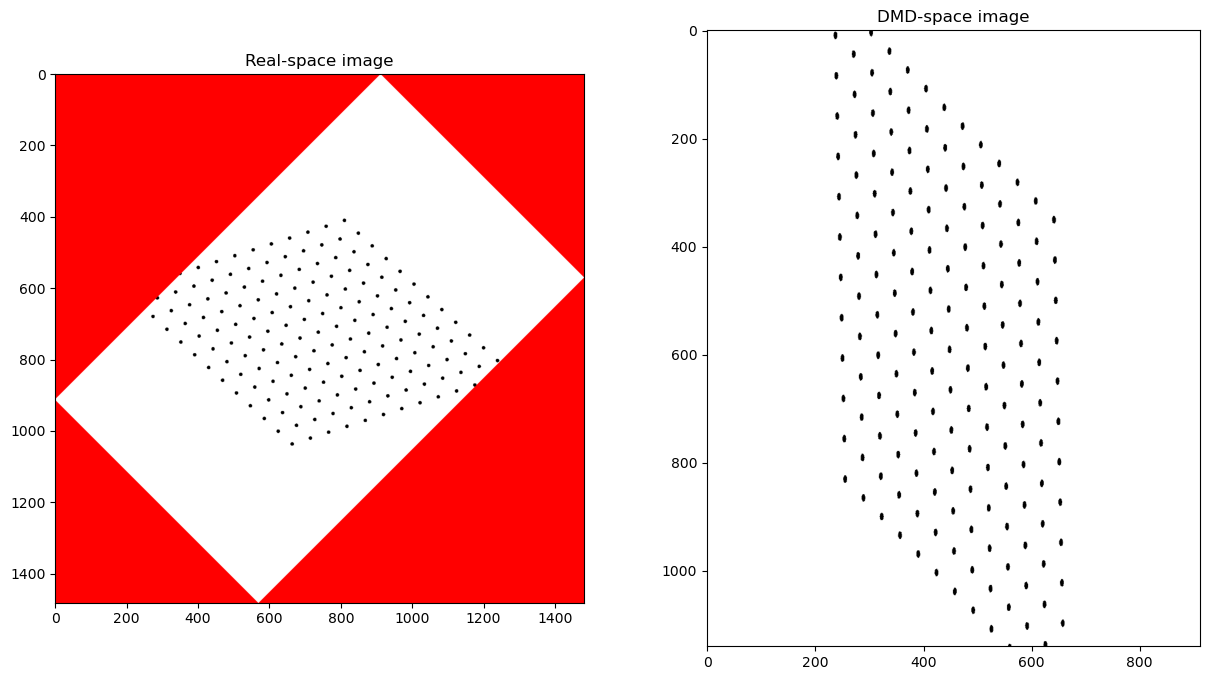

In [3]:
r = 5
step = 5
sites1 = [(i, j) for i in range(-30, 31, step) for j in range(-30, 31, step)]

dmd.setRealArray(color=1)
for i, j in sites1:
    x = i * V[0][0] + j * V[1][0] + R[0] - 1
    y = i * V[0][1] + j * V[1][1] + R[1] - 1
    dmd.drawPattern(painter.drawCircleXY(x, y, r), color=0, template_color=1, reset=False)

dmd.saveFrameToFile(save_dir, f'circle_array_python_r={r}_step={step}_inverted.bmp')
dmd.displayPattern()

#### Draw an O pattern

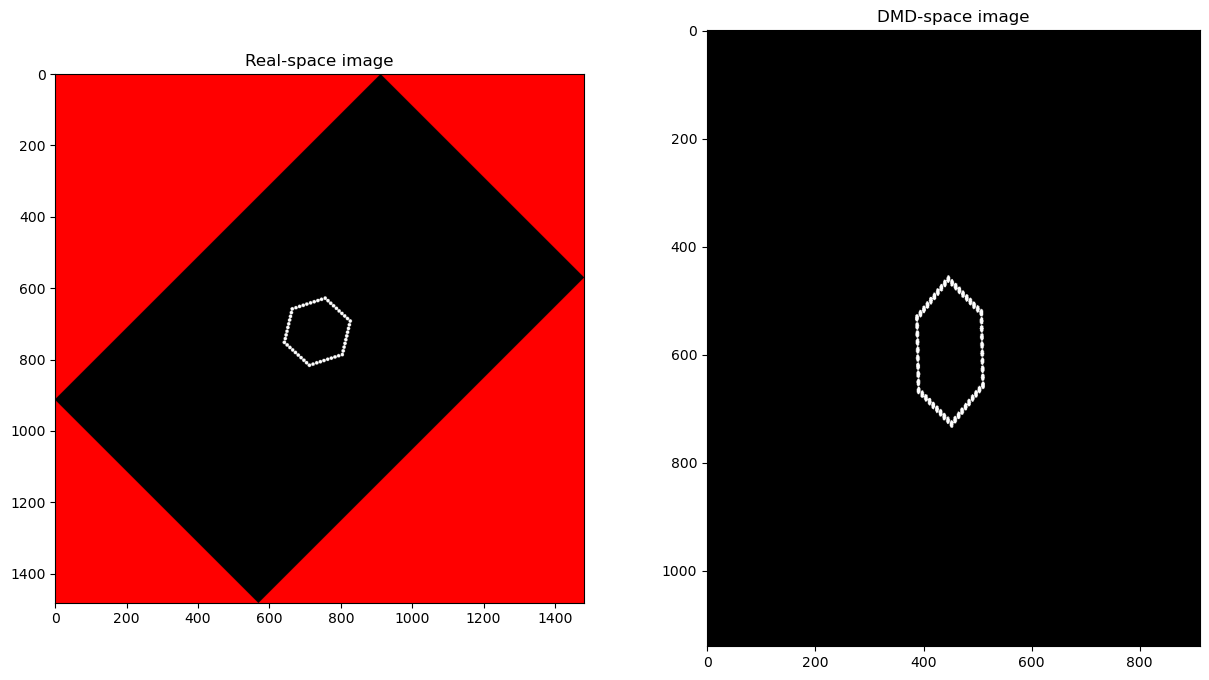

In [4]:
r = 5
sites = [(0, i) for i in range(0, 10)] + [(i, 9) for i in range(-1, -10, -1)] + [(-9-i, 9-i) for i in range(1, 10)] 
sites += [(-18, -i) for i in range(1, 10)] + [(i-17, -9) for i in range(0, 9)] + [(i - 9, i - 9) for i in range(1, 10)]
sites = [(i + 9, j) for i, j in sites]
dmd.setRealArray(color=0)
for i, j in sites:
    x = i * V[0][0] + j * V[1][0] + R[0] - 1
    y = i * V[0][1] + j * V[1][1] + R[1] - 1
    dmd.drawPattern(painter.drawCircleXY(x, y, r), color=1, template_color=0, reset=False)
dmd.saveFrameToFile(save_dir, f'pattern_O.bmp')
dmd.displayPattern()

### Calibrated Sequences

In [2]:
latx_start = -4.0
latx_end = 5.0
latx_step = 0.1

latx_values = list(np.arange(latx_start, latx_end, latx_step)) + [latx_end] * 6
len(latx_values)

96

In [3]:
latx_values_padded = [latx_start] * 24 + latx_values + [latx_end] * 24
latx_values_padded, len(latx_values_padded)

([-4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -4.0,
  -3.9,
  -3.8,
  -3.6999999999999997,
  -3.5999999999999996,
  -3.4999999999999996,
  -3.3999999999999995,
  -3.2999999999999994,
  -3.1999999999999993,
  -3.099999999999999,
  -2.999999999999999,
  -2.899999999999999,
  -2.799999999999999,
  -2.699999999999999,
  -2.5999999999999988,
  -2.4999999999999987,
  -2.3999999999999986,
  -2.2999999999999985,
  -2.1999999999999984,
  -2.0999999999999983,
  -1.9999999999999982,
  -1.8999999999999981,
  -1.799999999999998,
  -1.699999999999998,
  -1.5999999999999979,
  -1.4999999999999978,
  -1.3999999999999977,
  -1.2999999999999976,
  -1.1999999999999975,
  -1.0999999999999974,
  -0.9999999999999973,
  -0.8999999999999972,
  -0.7999999999999972,
  -0.6999999999999971,
  -0.599999999999997,
  -0.4999999999999969,
  -0.3999999999999968,
  -0.29999

In [4]:
r = 15
Vec = V[0]
scan_values = [(latx * Vec[0] + R[0] - 1, latx * Vec[1] + R[1] - 1) for latx in latx_values_padded]

sequence_config = {
    'directory': save_dir + f'sequence/black_moving_circle_v1_r={r}_start={latx_start}_end={latx_end}_step={latx_step}/',
    'filename': 'black_moving_circle',
    'description': 'Black circle on a white background with moving center',
    'num_frames': len(scan_values),
    'params': [{
        'painter_method': 'drawCircleCoord',
        'painter_args': {'radius': r},
        'draw_args': {'color': 0},
        'sequence_varname': 'coord',
        'sequence_varvalues': scan_values,
    }]
}

sequence = SequencePattern(**sequence_config)
sequence.save()

In [71]:
r = 20
Vec = V[0]
Vec2 = V[1]
scan_values = [(latx * Vec[0] + 6*Vec2[0] + R[0] - 1, latx * Vec[1] + 6*Vec2[1] + R[1] - 1) for latx in latx_values_padded]
scan_values2 = [(latx * Vec[0] - 6*Vec2[0] + R[0] - 1, latx * Vec[1]- 6*Vec2[0] + R[1] - 1) for latx in latx_values_padded]

sequence_config = {
    'directory': save_dir + f'sequence/black_moving_circle2_v1_r={r}_start={latx_start}_end={latx_end}_step={latx_step}/',
    'filename': 'black_moving_circle',
    'description': 'Black circle on a white background with moving center',
    'num_frames': len(scan_values),
    'params': [{
        'painter_method': 'drawCircleCoord',
        'painter_args': {'radius': r},
        'draw_args': {'color': 0},
        'sequence_varname': 'coord',
        'sequence_varvalues': scan_values,
    }, 
    {
        'painter_method': 'drawCircleCoord',
        'painter_args': {'radius': r},
        'draw_args': {'color': 0},
        'sequence_varname': 'coord',
        'sequence_varvalues': scan_values2,
    }
    ]
}

sequence = SequencePattern(**sequence_config)
sequence.save()